# Load raster data via a tile steam

In [1]:
import warnings
from datetime import datetime

import matplotlib.pyplot as plt

import geoengine as ge

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030/api
User Id:             40144bfe-28a7-483f-bd12-ebb2d260ee19
Session Id:          3abfb72c-558c-4598-ba0f-cb3d5c93bde1
Session valid until: 2025-09-12T20:07:37.922Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow_def = ge.workflow_builder.operators.GdalSource(dataset="ndvi")
workflow_def = ge.workflow_builder.operators.Downsampling(
    source_operator=workflow_def, output_method="resolution", output_x=0.5, output_y=0.5
)
workflow = ge.register_workflow(workflow=workflow_def)
workflow

a6db7999-78e3-5b7a-b069-87ab9f7554e4

## Define a query rectangle

In [5]:
time_start = datetime.strptime("2014-04-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")
time_end = datetime.strptime("2014-06-01T12:00:00.000Z", "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = ge.QueryRectangle(
    ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
    ge.TimeInterval(time_start, time_end),
    # ge.SpatialResolution(0.5, 0.5),
)

## Query the raster workflow as single tiles

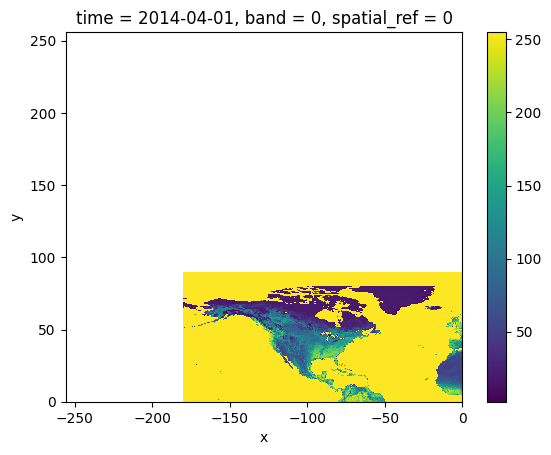

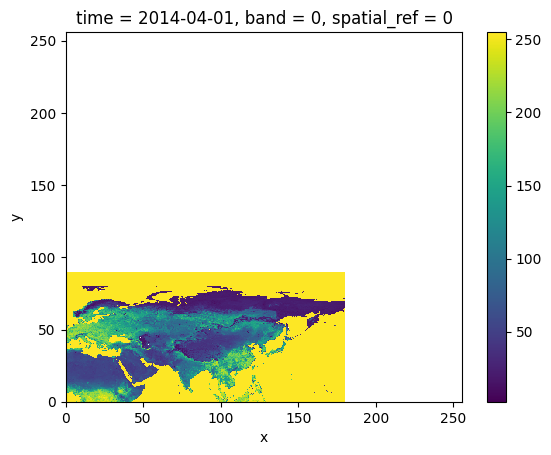

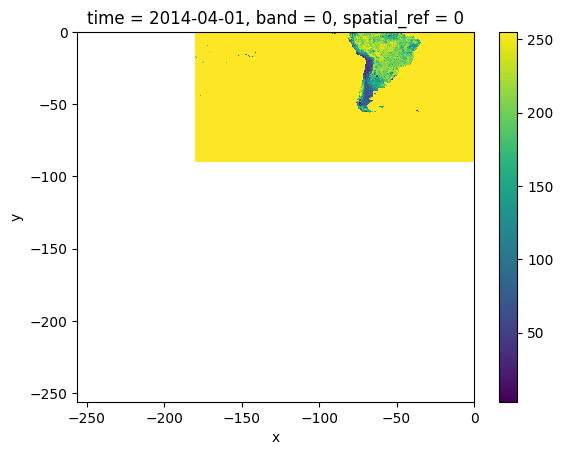

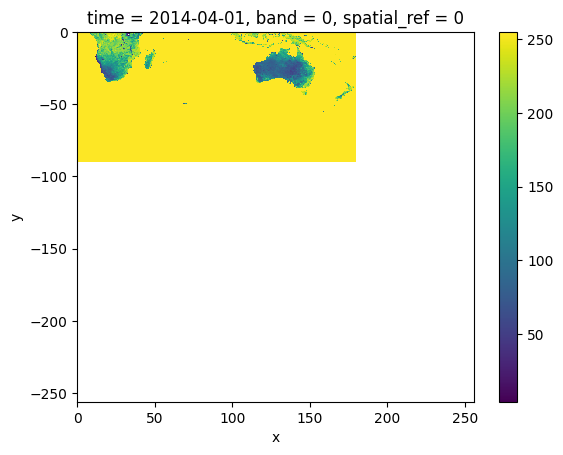

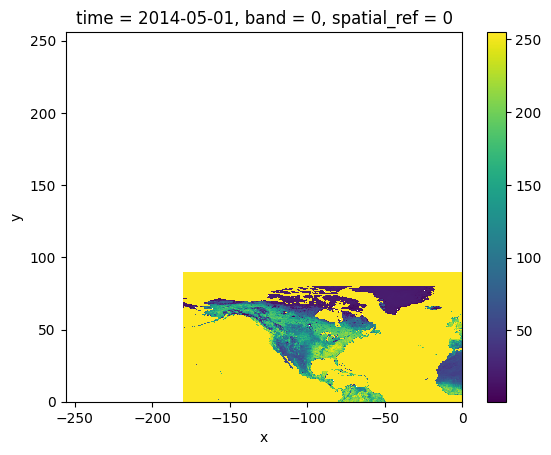

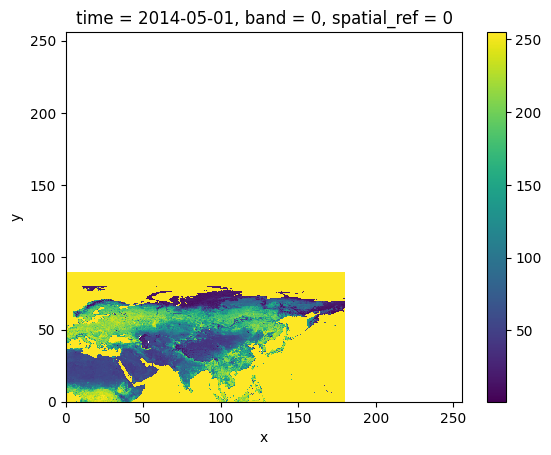

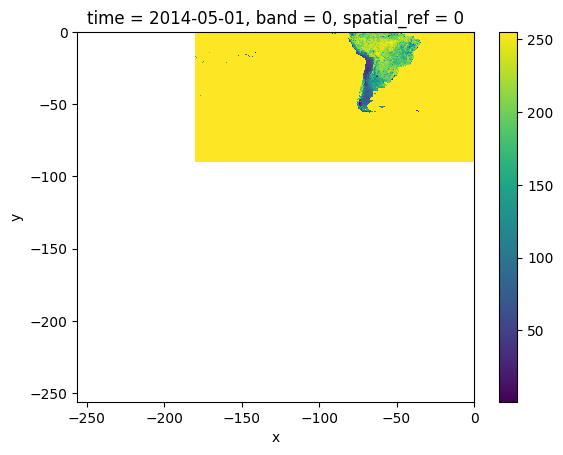

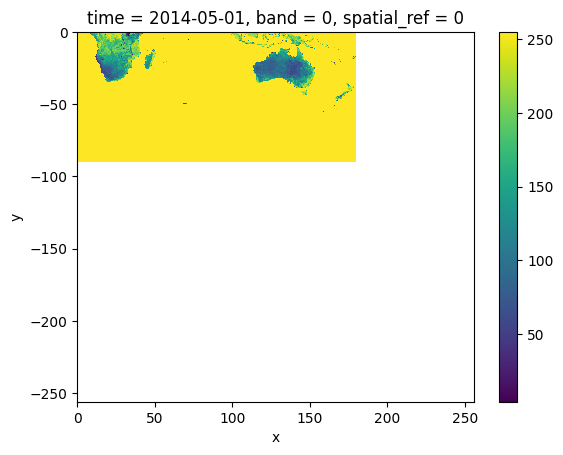

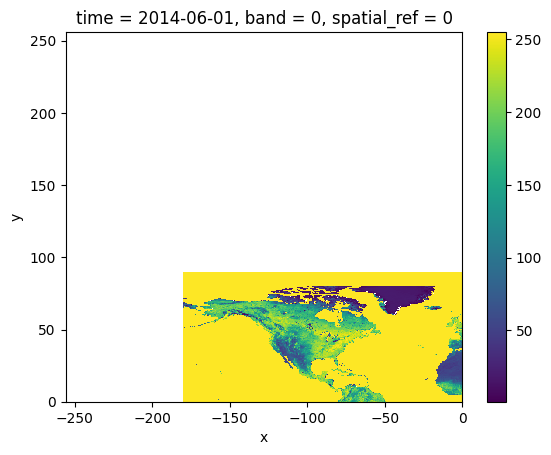

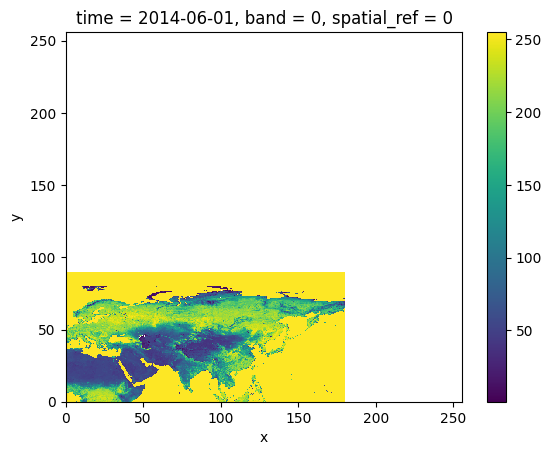

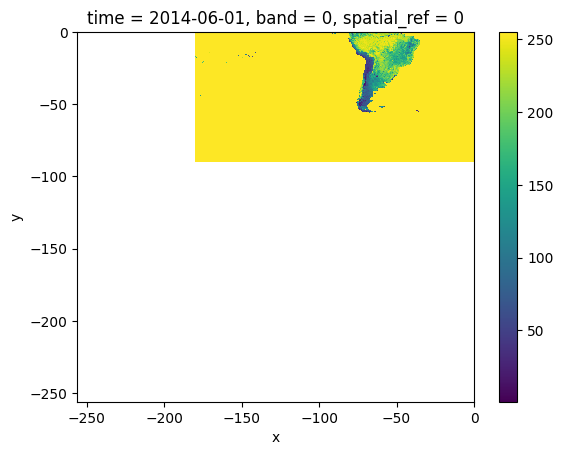

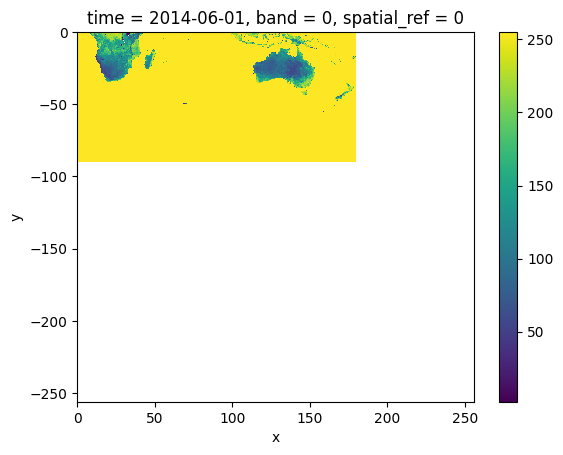

In [6]:
async for tile in workflow.raster_stream(bbox):
    tile.to_xarray().plot()
    plt.show()

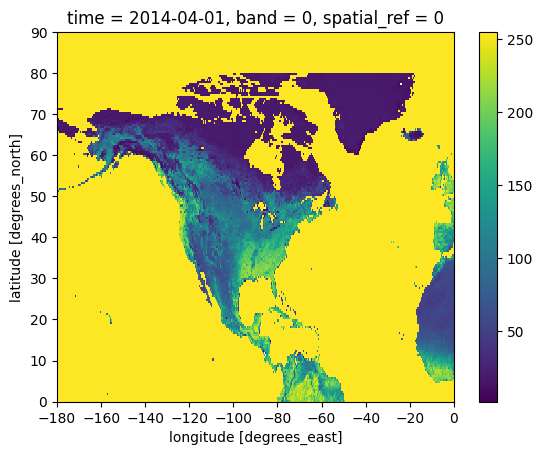

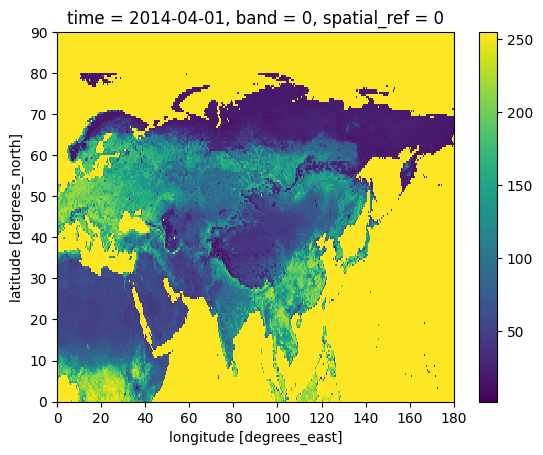

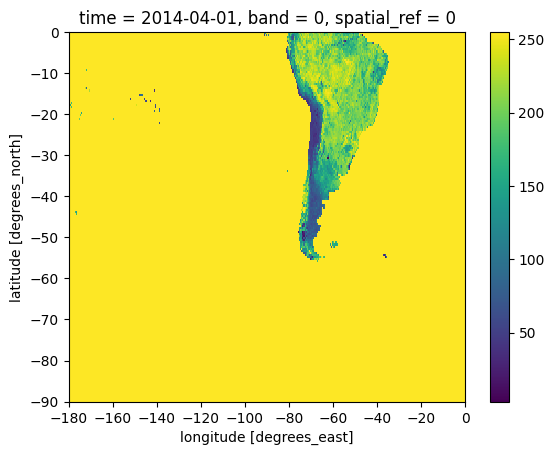

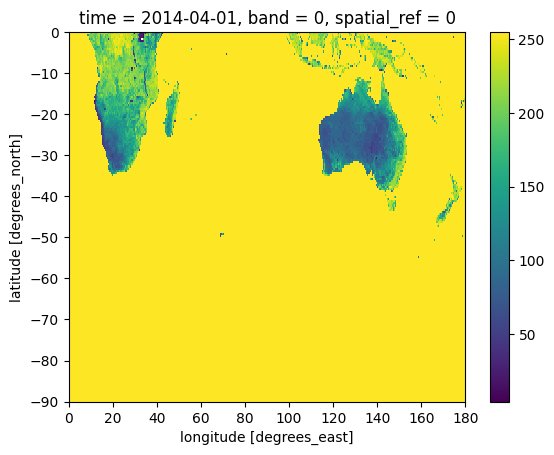

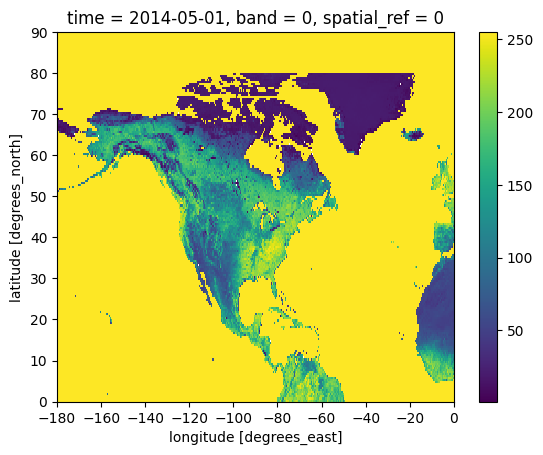

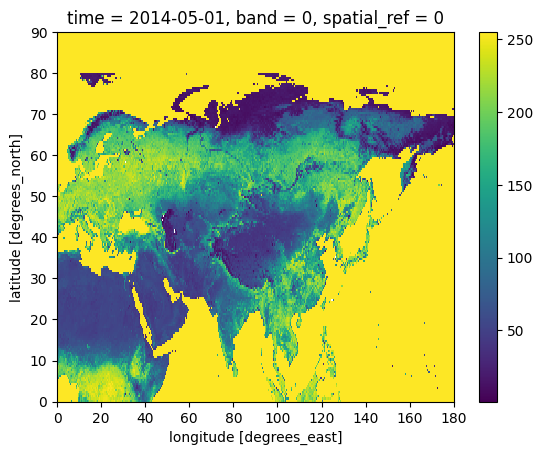

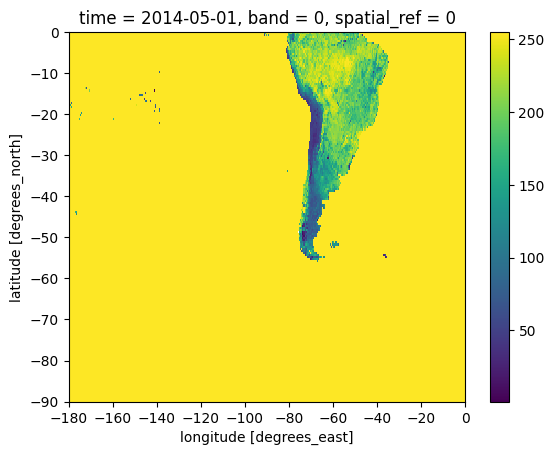

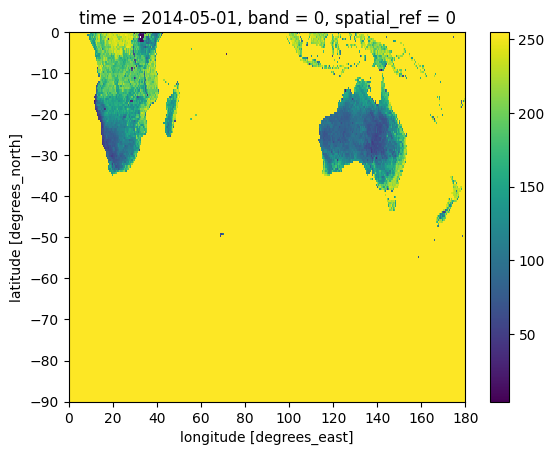

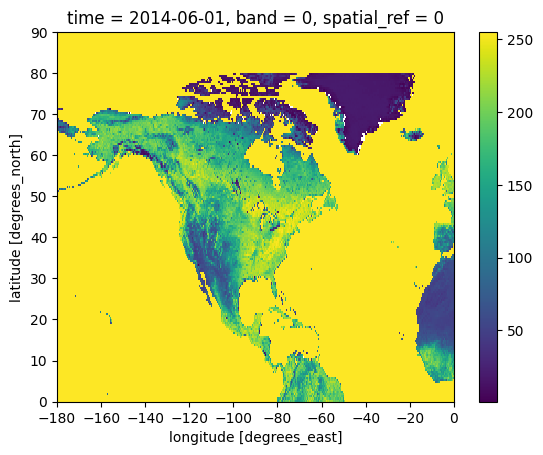

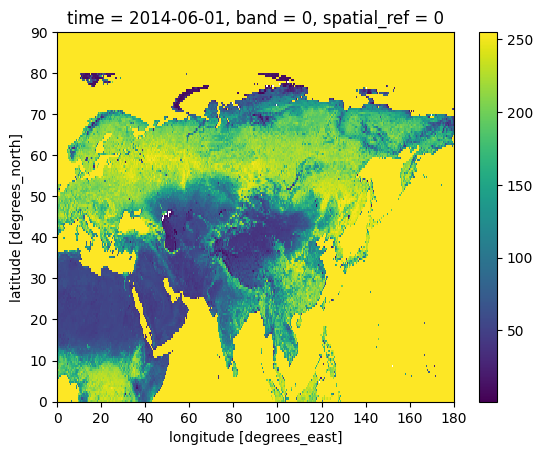

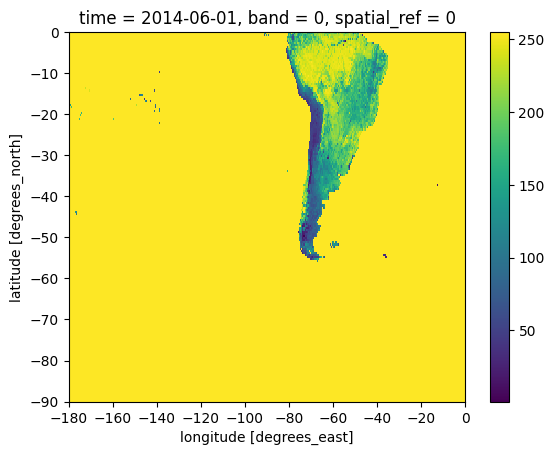

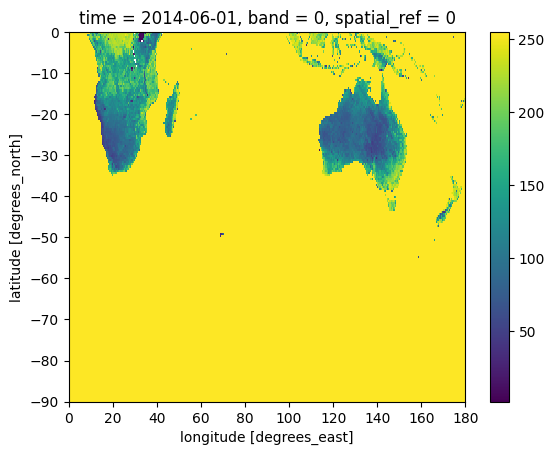

In [7]:
# setting `clip_to_query_rectangle=True` may output a warning, but this is a false positive from the underlying library
warnings.simplefilter(action="ignore", category=FutureWarning)


async for tile in workflow.raster_stream(bbox):
    tile.to_xarray(clip_with_bounds=bbox.spatial_bounds).plot()
    plt.show()

# Query single tiles, merge them locally and output them as a single `DataArray`

default (no clip)


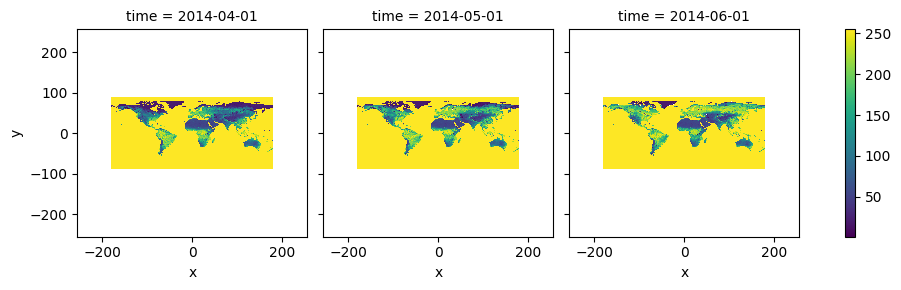

clip to query rectangle


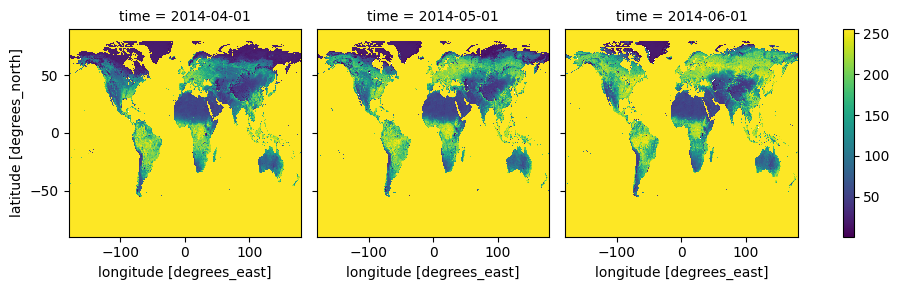

<xarray.DataArray (time: 3, band: 1, y: 360, x: 720)> Size: 3MB
array([[[[255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         ...,
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.]]],


       [[[255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         ...,
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.]]],


       [[[255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         ...,
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.],
         [255., 255., 255., ..., 255., 255., 255.]]]],
      shape=(3, 1, 360, 720), dtype=float32)
Coordinates:
  * x            (x) float64 6kB -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * y            (y) float64 3kB 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * time         (time) datetime64[ns] 24B 2014-04-01 2014-05-01 2014-06-01
  * band         (band) int64 8B 0
    spatial_ref  int64 8B 0

In [8]:
# setting `clip_to_query_rectangle=True` may output a warning, but this is a false positive from the underlying library
warnings.simplefilter(action="ignore", category=FutureWarning)

print("default (no clip)")

array = await workflow.raster_stream_into_xarray(bbox)

array.plot(col="time")
plt.show()

print("clip to query rectangle")

array = await workflow.raster_stream_into_xarray(bbox, clip_to_query_rectangle=True)

array.plot(col="time")
plt.show()

array